# Sales Data Analysis

## Data Exploration & Cleaning

import pandas as pd
import os
os.chdir(r'C:\Users\Chanwoo\Desktop\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')

In [3]:
# read all files from current directory
files = [file for file in os.listdir()]

#Check
#for file in files:
#    print(file)
complete_data = pd.DataFrame()

In [4]:
for file in files:
    df = pd.read_csv(file)
    complete_data = pd.concat([complete_data, df])
#complete_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#Clean Data

#row of NA data
nan_df = complete_data[complete_data.isna().any(axis=1)]

#remove NA data
complete_data = complete_data.dropna(how='all')

#Find 'or' and remove
complete_data = complete_data[complete_data['Order Date'].str[0:2] != 'Or']
complete_data.head()

#Coerce datatype
complete_data['Quantity Ordered'] = pd.to_numeric(complete_data['Quantity Ordered'])
complete_data['Price Each'] = pd.to_numeric(complete_data['Price Each'])

In [6]:
# Add Month Column
complete_data['Month'] = complete_data['Order Date'].str[0:2]
complete_data['Month'] = complete_data['Month'].astype('int32')

# Add sales Column
complete_data['Sales'] = complete_data['Quantity Ordered'] * complete_data['Price Each']
#complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Which month sold the most?

Text(0.5, 0, 'Months')

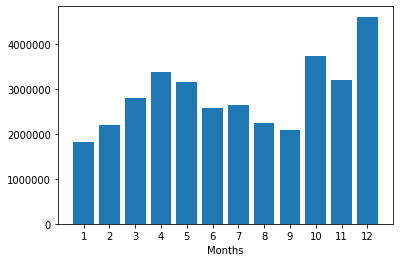

In [7]:
#Group by month 
sales_by_month = complete_data.groupby('Month').sum()

import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, sales_by_month['Sales'])
plt.show
plt.xticks(months)
plt.xlabel('Months')

## Which city sold the most?

In [8]:
#Add City column  .apply()
#complete_data['City'] = complete_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#complete_data.head()

def get_city(address):
    return address.split(',')[1]
complete_data['City'] = complete_data['Purchase Address'].apply(lambda x: get_city(x))


def get_state(address):
    tmp = address.split(',')[2]
    return tmp.split(' ')[1]
complete_data['State'] = complete_data['Purchase Address'].apply(lambda x:get_state(x))

complete_data["City, State"] = complete_data["City"] + ", " + complete_data["State"]
complete_data.head()


#Fstrings
#complete_data["City, State"] = complete_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
#complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,"City, State"
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"


Text(0.5, 0, 'Cities')

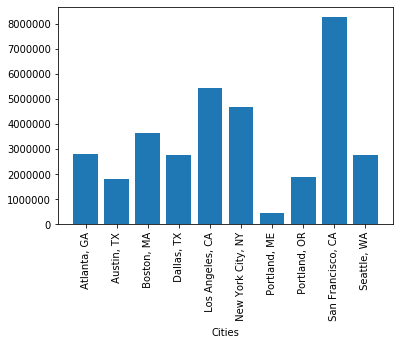

In [34]:
sales_by_city = complete_data.groupby('City, State').sum()
#sales_by_city
#Get correct order of cities
cities = [city for city, df in complete_data.groupby("City, State")]
plt.bar(cities, sales_by_city['Sales'])
plt.show
plt.xticks(cities, rotation = "vertical")
plt.xlabel('Cities')


## What time should the shop advertise the most?

In [10]:
complete_data["Order Date"] = pd.to_datetime(complete_data['Order Date'])
#complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,"City, State"
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"


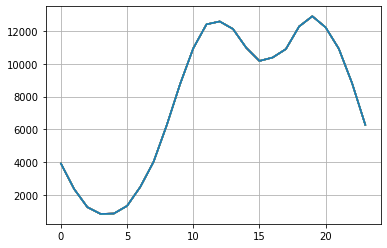

In [11]:
complete_data["Hour"] = complete_data['Order Date'].dt.hour
complete_data["Hour"].median()

hours = [hour for hour, df in complete_data.groupby("Hour")]
plt.plot(hours, complete_data.groupby("Hour").count())
plt.grid()
plt.show()

## What pairwise products sold the most?

In [17]:
new_df = complete_data[complete_data["Order ID"].duplicated(keep = False)]
new_df["Group"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
new_df = new_df[["Order ID", "Group"]].drop_duplicates()
#new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Group
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [36]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in new_df["Group"]:
    #print(row)
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]